<a href="https://colab.research.google.com/github/Duddu64/PDI/blob/main/TransformadaFourier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transformada de Fourier

Bibliotecas

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

Imagens

In [11]:
imgs={
    0: Image.open("/content/car.tif").convert('L'),
    1: Image.open("/content/len_periodic_noise.png").convert('L'),
    2: Image.open("/content/newspaper_shot_woman.tif").convert('L'),
    3: Image.open("/content/periodic_noise.png").convert('L'),
    4: Image.open("/content/sinc.png").convert('L'),
}

Simulando a função sinc

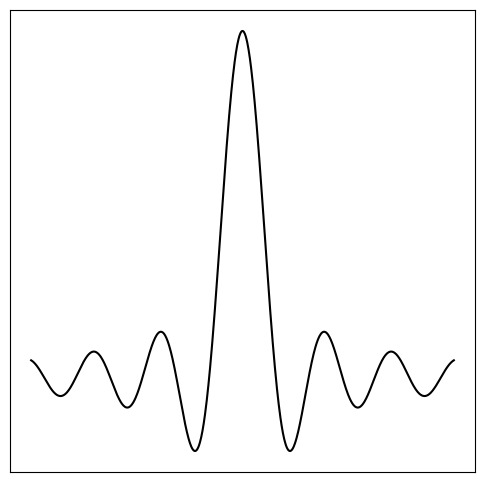

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def sinc(x):
    return np.sinc(x / np.pi)

def plot_sinc(x_range=(-20, 20), num_points=1000, save_path='./images/SINC.png'):
    x = np.linspace(x_range[0], x_range[1], num_points)
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.plot(x, sinc(x), color='black')
    ax.set_facecolor('white')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)

plot_sinc()


Transformada de Fourier

In [7]:
def Transformada(img):
    img_ff=np.fft.fft2(img)
    img_ff_shift = np.fft.fftshift(img_ff)
    img_res=20*np.log(np.abs(1+img_ff_shift))

    return img_res, img_ff_shift

In [8]:
def Transformada_ph(img):
    img_ff=np.fft.fft2(img)
    img_ff_phase = np.angle(img_ff)

    return img_ff_phase

In [9]:
def Inv_Transformada(img):
  inv_fourier = np.fft.ifftshift(img)
  inv_fourier = np.fft.ifft2(inv_fourier)
  return np.abs(inv_fourier)

Plotagem


In [10]:
def Plota (img1, img2, img3, img4):
    fig, axis = plt.subplots(1, 4, figsize=(15, 5))
    axis[0].imshow(img1, cmap='gray')
    axis[0].set_title('Original')

    axis[1].imshow(img2, cmap='gray')
    axis[1].set_title('Fourier da imagem ')

    axis[2].imshow(img3, cmap='gray')
    axis[2].set_title('Phase da imagem ')

    axis[3].imshow(img4, cmap='gray')
    axis[3].set_title('Fourier Inversa da imagem ')
    plt.show()

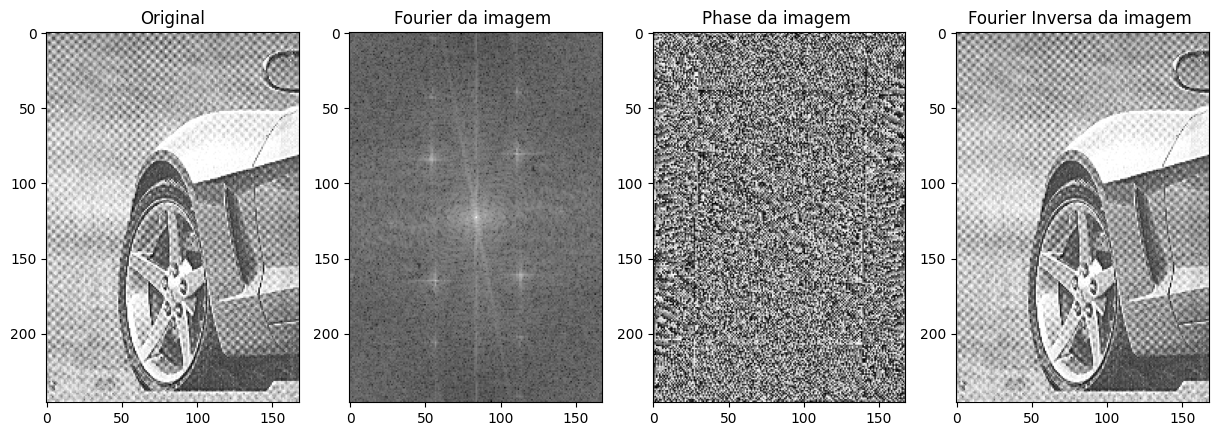

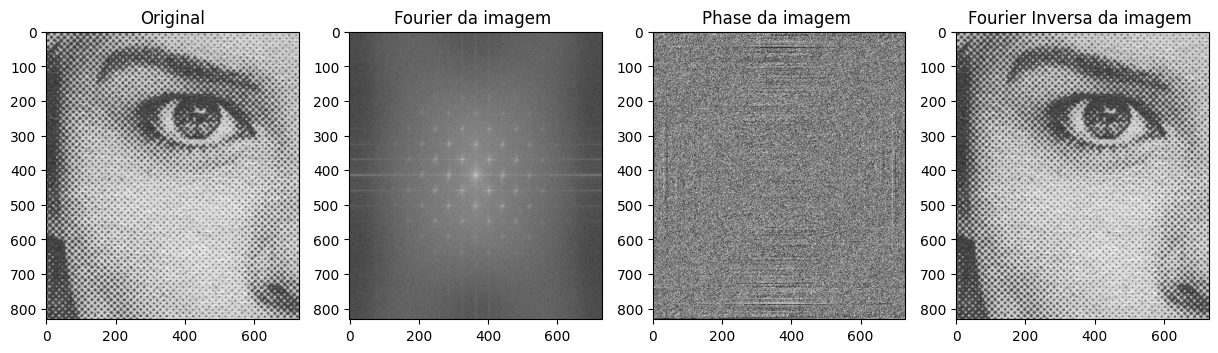

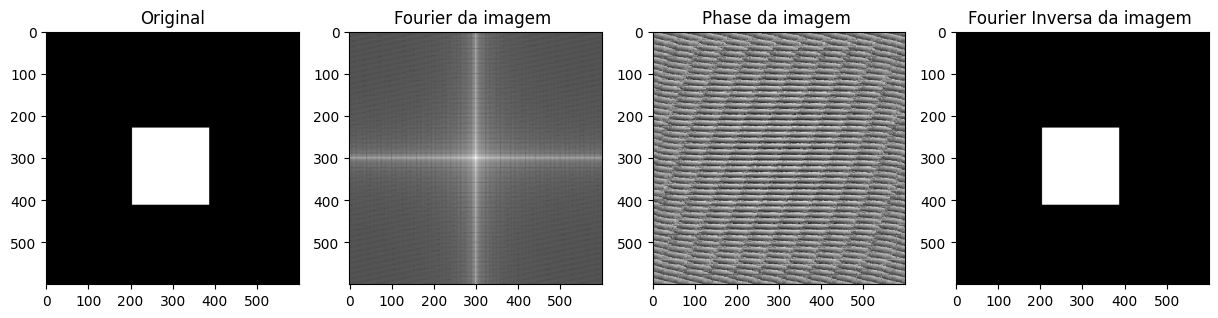

In [12]:
for i in range(0,5):
  transformada, transformada_shift=Transformada(imgs[i])
  transformada_phase=Transformada_ph(imgs[i])
  inv_transformada=Inv_Transformada(transformada_shift)
  Plota(imgs[i], transformada, transformada_phase, inv_transformada)

Plotagem 3D

In [15]:
def Plota3d(imagemFourier):
    fig = plt.figure(figsize=(15, 15))
    x = np.arange(0, imagemFourier.shape[0], 1)
    y = np.arange(0, imagemFourier.shape[1], 1)
    X, Y = np.meshgrid(x, y)
    Z = imagemFourier[X, Y]

    ax1 = fig.add_subplot(221, projection='3d')
    ax1.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
    ax1.set_title(f'Fourier da imagem')

    ax2 = fig.add_subplot(222, projection='3d')
    ax2.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
    ax2.view_init(90, 0)
    ax2.set_title(f'Fourier da imagem (Vista superior)')

    plt.show()

In [16]:
for i in range(0,5):
  transformada, transformada_shift=Transformada(imgs[i])
  Plota3d(transformada)